In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
ola = pd.read_csv('ola.csv')

In [3]:
ola.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
# EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [6]:
# Dropping 'Unnamed: 0' column
ola.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [7]:
ola.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [8]:
ola.shape

(19104, 13)

In [9]:
## Checking the datatypes of the columns

In [10]:
ola.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

In [11]:
## Changing the datatypes of the columns to their respective datatypes

In [12]:
ola['MMM-YY'] = pd.to_datetime(ola['MMM-YY'])
ola['Dateofjoining'] = pd.to_datetime(ola['Dateofjoining'])
ola['LastWorkingDate'] = pd.to_datetime(ola['LastWorkingDate'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_67888\1572071455.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ola['MMM-YY'] = pd.to_datetime(ola['MMM-YY'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_67888\1572071455.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ola['Dateofjoining'] = pd.to_datetime(ola['Dateofjoining'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_67888\1572071455.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ola['LastWorkingDate'] = pd.to_datetime(ola['LastWorkingDate'])


In [13]:
ola.dtypes

MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

In [14]:
## Checking missing Values

In [15]:
ola.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [16]:
# Insight: Above table shows Age column having 61 missing values, Gender column having 52  missing values and LastWorkingDate having 17488 missing values i.e.17488 drivers have not left the company. 

In [17]:
ola.Gender.value_counts()

Gender
0.0    11074
1.0     7978
Name: count, dtype: int64

In [18]:
# Replacing 0.0 with Male and 1.0 with Female 

In [19]:
ola['Gender'].replace({0.0:'Male', 1.0:'Female'}, inplace = True)

In [20]:
ola.Gender.value_counts()

Gender
Male      11074
Female     7978
Name: count, dtype: int64

In [21]:
## Replacing missing values using KNN Imputer

In [22]:
ola.select_dtypes(np.number).columns

Index(['Driver_ID', 'Age', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [23]:
num_data = ola.select_dtypes(np.number)

In [24]:
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform', metric = 'nan_euclidean')

In [25]:
ola1 = imputer.fit_transform(num_data)

In [26]:
ola1 = pd.DataFrame(ola1)

In [27]:
ola1.columns = num_data.columns

In [28]:
ola1.isnull().sum()

Driver_ID               0
Age                     0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [29]:
## All missing values have been imputed.

In [30]:
rem = list(set(ola.columns).difference(set(ola1.columns)))

In [31]:
ola1.columns

Index(['Driver_ID', 'Age', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [32]:
new_df = pd.concat([ola1,ola[rem]],axis = 1)

In [33]:
new_df.columns

Index(['Driver_ID', 'Age', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'Gender',
       'LastWorkingDate', 'Dateofjoining', 'City', 'MMM-YY'],
      dtype='object')

In [34]:
agg_function = {'Age':'max',
               'Education_Level':'last',
               'Income':'last',
               'Joining Designation':'last',
               'Grade':'last',
               'Total Business Value':'sum',
               'Quarterly Rating':'last',
               'Gender':'first',
               'Dateofjoining':'last',
               'LastWorkingDate':'last',
               'City':'first',
               }

In [35]:
agg_df = new_df.groupby(['Driver_ID','MMM-YY']).aggregate(agg_function).sort_index(ascending = [True,True])

In [36]:
agg_df.head(10)

Age  Education_Level   Income  Joining Designation  \
Driver_ID MMM-YY                                                            
1.0       2019-01-01  28.0              2.0  57387.0                  1.0   
          2019-02-01  28.0              2.0  57387.0                  1.0   
          2019-03-01  28.0              2.0  57387.0                  1.0   
2.0       2020-11-01  31.0              2.0  67016.0                  2.0   
          2020-12-01  31.0              2.0  67016.0                  2.0   
4.0       2019-12-01  43.0              2.0  65603.0                  2.0   
          2020-01-01  43.0              2.0  65603.0                  2.0   
          2020-02-01  43.0              2.0  65603.0                  2.0   
          2020-03-01  43.0              2.0  65603.0                  2.0   
          2020-04-01  43.0              2.0  65603.0                  2.0   

                      Grade  Total Business Value  Quarterly Rating Gender  \
Driver_ID MMM-YY                                                             
1.0       2019-01-01    1.0             2381060.0               2.0   Male   
          2019-02-01    1.0             -665480.0               2.0   Male   
          2019-03-01    1.0                   0.0               2.0   Male   
2.0       2020-11-01    2.0                   0.0               1.0   Male   
          2020-12-01    2.0                   0.0               1.0   Male   
4.0       2019-12-01    2.0                   0.0               1.0   Male   
          2020-01-01    2.0                   0.0               1.0   Male   
          2020-02-01    2.0                   0.0               1.0   Male   
          2020-03-01    2.0              350000.0               1.0   Male   
          2020-04-01    2.0                   0.0               1.0   Male   

                     Dateofjoining LastWorkingDate City  
Driver_ID MMM-YY                                         
1.0       2019-01-01    2018-12-24             NaT  C23  
          2019-02-01    2018-12-24             NaT  C23  
          2019-03-01    2018-12-24      2019-03-11  C23  
2.0       2020-11-01    2020-11-06             NaT   C7  
          2020-12-01    2020-11-06             NaT   C7  
4.0       2019-12-01    2019-12-07             NaT  C13  
          2020-01-01    2019-12-07             NaT  C13  
          2020-02-01    2019-12-07             NaT  C13  
          2020-03-01    2019-12-07             NaT  C13  
          2020-04-01    2019-12-07      2020-04-27  C13

In [37]:
agg_df.rename(columns = {'Dateofjoining':'Date_of_joining','LastWorkingDate':'Last_Working_Date','Total Business Value':'Total_Business_Value','Joining Designation':'Joining_Designation','Quarterly Rating':'Quarterly_Rating'},inplace = True)

In [38]:
agg_df.columns

Index(['Age', 'Education_Level', 'Income', 'Joining_Designation', 'Grade',
       'Total_Business_Value', 'Quarterly_Rating', 'Gender', 'Date_of_joining',
       'Last_Working_Date', 'City'],
      dtype='object')

In [39]:
# agg_df['Gender'].replace({'Male':0,'Female':1},inplace = True)

In [40]:
agg_df.isna().sum()

Age                         0
Education_Level             0
Income                      0
Joining_Designation         0
Grade                       0
Total_Business_Value        0
Quarterly_Rating            0
Gender                     52
Date_of_joining             0
Last_Working_Date       17488
City                        0
dtype: int64

In [41]:
final_data = pd.DataFrame()

In [42]:
final_data['Driver_ID'] = new_df['Driver_ID'].unique()
final_data['Age'] = list(agg_df.groupby('Driver_ID',axis = 0).max('MMM-YY')['Age'])
final_data['Education_Level'] = list(agg_df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
final_data['Income'] = list(agg_df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
final_data['Joining_Designation'] = list(agg_df.groupby('Driver_ID').agg({'Joining_Designation':'last'})['Joining_Designation'])
final_data['Grade'] = list(agg_df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
final_data['Total_Business_Value'] = list(agg_df.groupby('Driver_ID').agg({'Total_Business_Value':'last'})['Total_Business_Value'])
final_data['Quarterly_Rating'] = list(agg_df.groupby('Driver_ID').agg({'Quarterly_Rating':'last'})['Quarterly_Rating'])
final_data['Date_of_joining'] = list(agg_df.groupby('Driver_ID').agg({'Date_of_joining':'last'})['Date_of_joining'])
final_data['Last_Working_Date'] = list(agg_df.groupby('Driver_ID').agg({'Last_Working_Date':'last'})['Last_Working_Date'])
final_data['City'] = list(agg_df.groupby('Driver_ID').agg({'City':'last'})['City'])
final_data['Gender'] = list(agg_df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])

In [43]:
final_data.isna().sum()

Driver_ID                 0
Age                       0
Education_Level           0
Income                    0
Joining_Designation       0
Grade                     0
Total_Business_Value      0
Quarterly_Rating          0
Date_of_joining           0
Last_Working_Date       765
City                      0
Gender                    0
dtype: int64

In [44]:
final_data.head()

,Driver_ID,Age,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Date_of_joining,Last_Working_Date,City,Gender
0,1.0,28.0,2.0,57387.0,1.0,1.0,0.0,2.0,2018-12-24,2019-03-11,C23,Male
1,2.0,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-06,NaT,C7,Male
2,4.0,43.0,2.0,65603.0,2.0,2.0,0.0,1.0,2019-12-07,2020-04-27,C13,Male
3,5.0,29.0,0.0,46368.0,1.0,1.0,0.0,1.0,2019-01-09,2019-03-07,C9,Male
4,6.0,31.0,1.0,78728.0,3.0,3.0,0.0,2.0,2020-07-31,NaT,C11,Female


In [45]:
## FEATURE ENGINEERING

In [46]:
## Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1.

In [47]:
QR1 = (agg_df.groupby('Driver_ID').agg({'Quarterly_Rating':'first'}))
QR2 = (agg_df.groupby('Driver_ID').agg({'Quarterly_Rating':'last'}))

In [48]:
qr = pd.DataFrame()

In [49]:
qr = (QR2['Quarterly_Rating'] > QR1['Quarterly_Rating']).reset_index()

In [50]:
qr.head()

,Driver_ID,Quarterly_Rating
0,1.0,False
1,2.0,False
2,4.0,False
3,5.0,False
4,6.0,True


In [51]:
empid = qr[qr['Quarterly_Rating'] == True]['Driver_ID']

In [52]:
qr1 = []
for i in final_data['Driver_ID']:
    if i in empid.values:
        qr1.append(1)
    else:
        qr1.append(0)
        
final_data['Quarterly_Rating_Increased'] = qr1

In [53]:
## Create a column which tells whether the income has increased for that driver - for those whose income has increased we assign the value 1.

In [54]:
Inc1 = (agg_df.groupby('Driver_ID').agg({'Income':'first'}))
Inc2 = (agg_df.groupby('Driver_ID').agg({'Income':'last'}))

In [55]:
Inc = pd.DataFrame()
Inc = (Inc2['Income'] > Inc1['Income']).reset_index()

In [56]:
empid_inc = Inc[Inc['Income'] == True]['Driver_ID']

In [57]:
inc = []
for i in final_data['Driver_ID']:
    if i in empid_inc.values:
        inc.append(1)
    else:
        inc.append(0)
        
final_data['Income_Increased'] = inc

In [58]:
final_data.head()

,Driver_ID,Age,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Date_of_joining,Last_Working_Date,City,Gender,Quarterly_Rating_Increased,Income_Increased
0,1.0,28.0,2.0,57387.0,1.0,1.0,0.0,2.0,2018-12-24,2019-03-11,C23,Male,0,0
1,2.0,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-06,NaT,C7,Male,0,0
2,4.0,43.0,2.0,65603.0,2.0,2.0,0.0,1.0,2019-12-07,2020-04-27,C13,Male,0,0
3,5.0,29.0,0.0,46368.0,1.0,1.0,0.0,1.0,2019-01-09,2019-03-07,C9,Male,0,0
4,6.0,31.0,1.0,78728.0,3.0,3.0,0.0,2.0,2020-07-31,NaT,C11,Female,1,0


In [90]:
## Create a column called target which tells whether the driver has left the company - driver whose last working day is present will have the value 1

In [94]:
final_data['Last_Working_Date'] = pd.Series(np.where(final_data['Last_Working_Date'].isna(),0,1))

In [95]:
target = []
for i in final_data['Last_Working_Date']:
    if i == 0:
        target.append(0)
    else:
        target.append(1)
        
final_data['Target'] = target

In [97]:
final_data.head()

,Driver_ID,Age,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Date_of_joining,Last_Working_Date,City,Gender,Quarterly_Rating_Increased,Income_Increased,Target,Month,Year
0,1.0,28.0,2.0,57387.0,1.0,1.0,0.0,2.0,2018-12-24,1,C23,Male,0,0,1,12,2018
1,2.0,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-06,0,C7,Male,0,0,0,11,2020
2,4.0,43.0,2.0,65603.0,2.0,2.0,0.0,1.0,2019-12-07,1,C13,Male,0,0,1,12,2019
3,5.0,29.0,0.0,46368.0,1.0,1.0,0.0,1.0,2019-01-09,1,C9,Male,0,0,1,1,2019
4,6.0,31.0,1.0,78728.0,3.0,3.0,0.0,2.0,2020-07-31,0,C11,Female,1,0,0,7,2020


In [98]:
final_data['Month'] = pd.to_datetime(final_data['Date_of_joining']).dt.month
final_data['Year'] = pd.to_datetime(final_data['Date_of_joining']).dt.year

In [99]:
final_data.head()

,Driver_ID,Age,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Date_of_joining,Last_Working_Date,City,Gender,Quarterly_Rating_Increased,Income_Increased,Target,Month,Year
0,1.0,28.0,2.0,57387.0,1.0,1.0,0.0,2.0,2018-12-24,1,C23,Male,0,0,1,12,2018
1,2.0,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-06,0,C7,Male,0,0,0,11,2020
2,4.0,43.0,2.0,65603.0,2.0,2.0,0.0,1.0,2019-12-07,1,C13,Male,0,0,1,12,2019
3,5.0,29.0,0.0,46368.0,1.0,1.0,0.0,1.0,2019-01-09,1,C9,Male,0,0,1,1,2019
4,6.0,31.0,1.0,78728.0,3.0,3.0,0.0,2.0,2020-07-31,0,C11,Female,1,0,0,7,2020


In [100]:
# Statistical summary
final_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Age,2381.0,33.770097,21.0,30.0,33.0,37.0,58.0,5.932286
Education_Level,2381.0,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Income,2381.0,59334.157077,10747.0,39104.0,55315.0,75986.0,188418.0,28383.666384
Joining_Designation,2381.0,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433
Grade,2381.0,2.096598,1.0,1.0,2.0,3.0,5.0,0.941522
Total_Business_Value,2381.0,266769.420412,-990000.0,0.0,0.0,196920.0,33747720.0,1134681.083303
Quarterly_Rating,2381.0,1.427971,1.0,1.0,1.0,2.0,4.0,0.809839
Date_of_joining,2381,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
Last_Working_Date,2381.0,0.678706,0.0,0.0,1.0,1.0,1.0,0.467071


In [101]:
# Observations from above statistical summary:
# 1. Min age of driver joining OLA is 21years while the max age is 58.
# 2. Almost 75% of the drivers have montly income less than 80,000.

In [102]:
## UNIVARIATE ANALYSIS

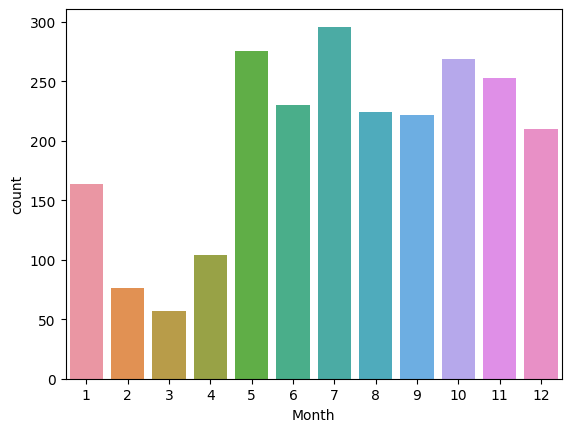

In [103]:
# 1. No. of drivers joining OLA every month
sns.countplot(data = final_data, x = final_data['Month'])
plt.show()

In [104]:
# Insights - 
# 1. Above plot shows that max drivers join OLA in the month of July with max retention of drivers are in between May to July.
# 2. Drop in the intake of drivers is seen from October with a max drop is seen in the month of March. 

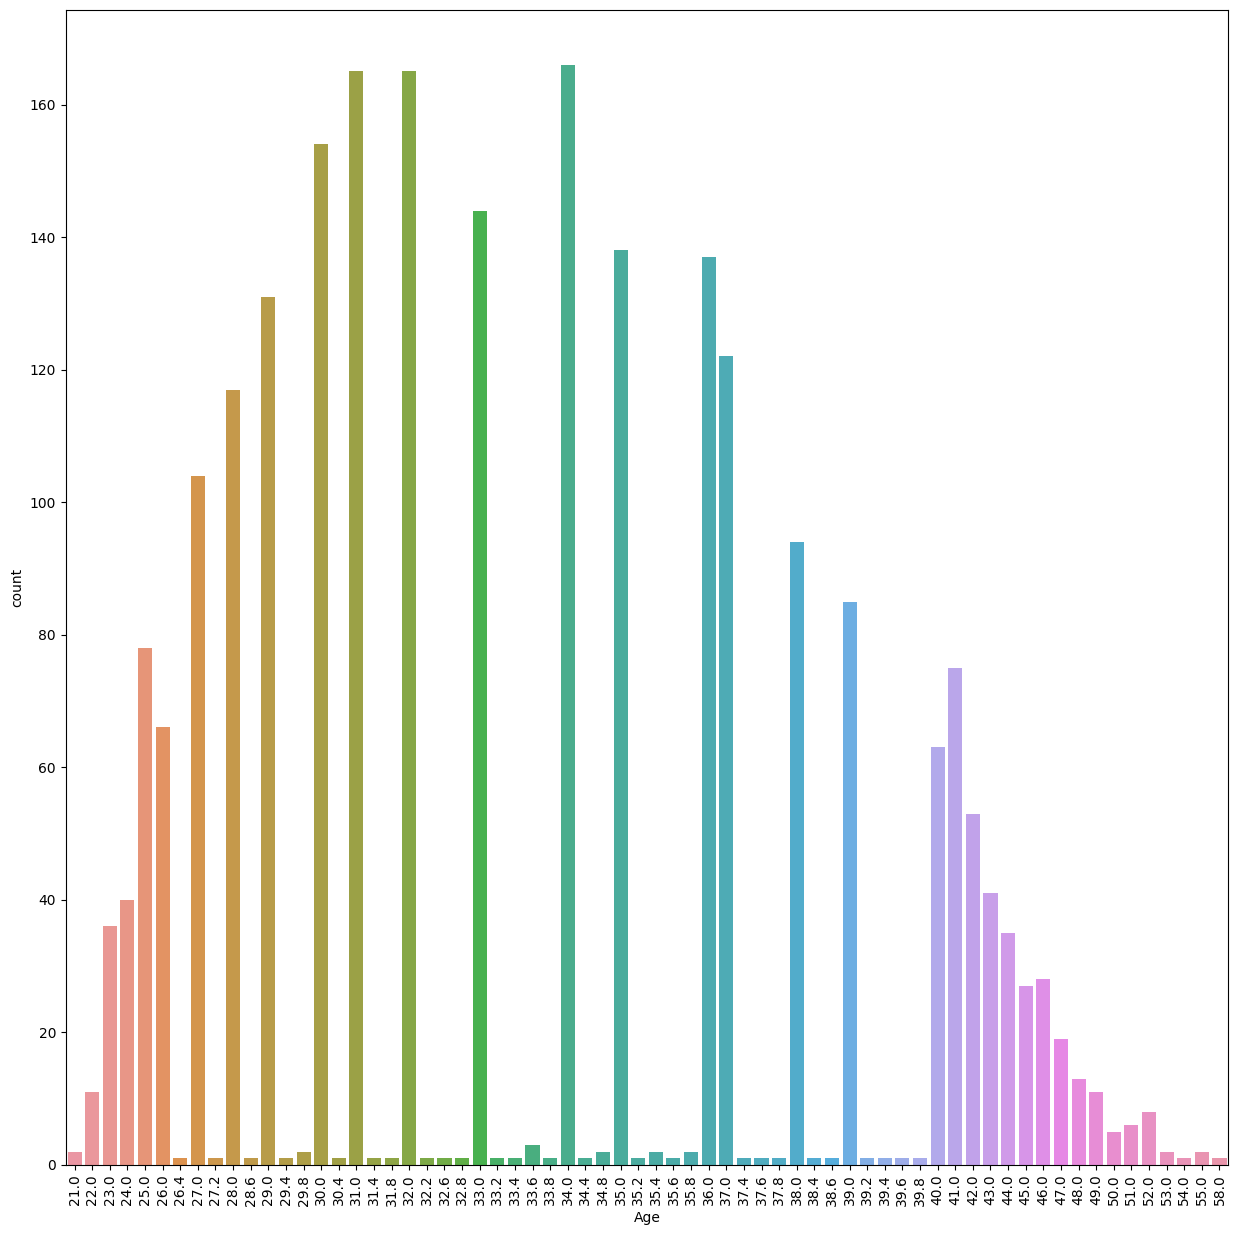

In [105]:
plt.figure(figsize = (15,15))
sns.countplot(data = final_data, x = final_data['Age'])
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Age', ylabel='count'>

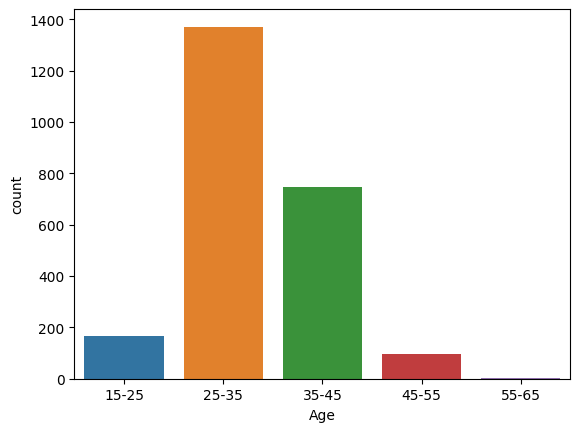

In [106]:
# 2. Age wise distribution of the drivers working for OLA.
age_grp = pd.cut(final_data.Age, bins = [15,25,35,45,55,65], labels = ['15-25', '25-35', '35-45', '45-55', '55-65'])
sns.countplot(data = final_data, x =  age_grp)

In [107]:
# Insights - 
# 1. Above countplot shows that max drivers in OLA are in the age group of 25 to 35.
# 2. ALmost negligible drivers join OLA within the age group of 55 to 65.

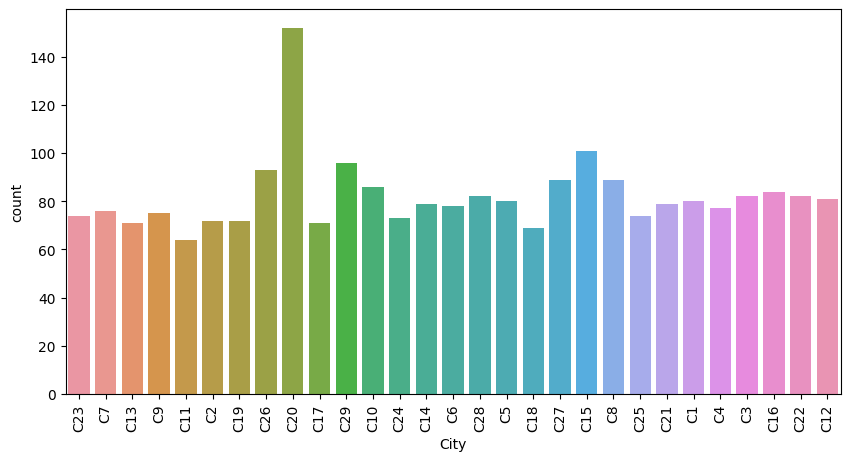

In [108]:
# 3. Citywise distribution of drivers
plt.figure(figsize = (10,5))
sns.countplot(data = final_data, x = 'City')
plt.xticks(rotation = 90)
plt.show()

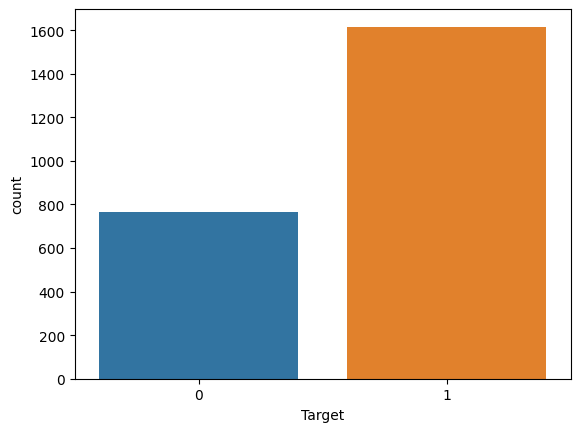

In [109]:
sns.countplot(data = final_data, x ='Target')
plt.show()

In [110]:
# Insights - 
# 1. Above countplot shows that the  churn rate of drivers in OLA is high are more number of drivers are leaving OLA than the ones retaining.

In [111]:
round(final_data['Target'].value_counts(normalize = True)*100,2)

Target
1    67.87
0    32.13
Name: proportion, dtype: float64

In [112]:
final_data['Year'].nunique()

8

In [113]:
# Insights - 
# Shows that 67.87% of drivers have quitted from OLA within a period of 8 years which is very high church rate.

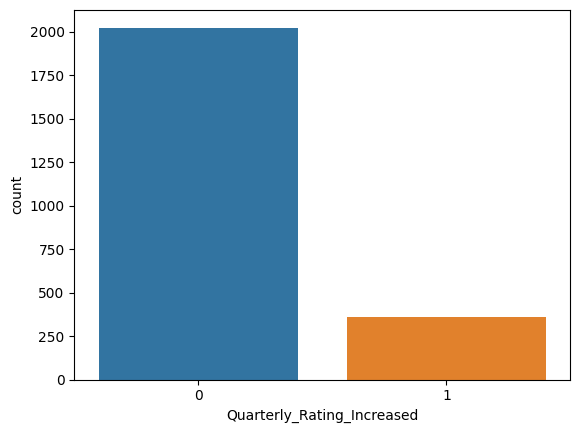

In [114]:
sns.countplot(data = final_data, x = 'Quarterly_Rating_Increased')
plt.show()

In [115]:
round(final_data['Quarterly_Rating_Increased'].value_counts(normalize = 'True')*100,2)

Quarterly_Rating_Increased
0    84.96
1    15.04
Name: proportion, dtype: float64

In [116]:
## Insights - 
## Above data shows that 84.67% of drivers did not receive an increase in their quarterly income.

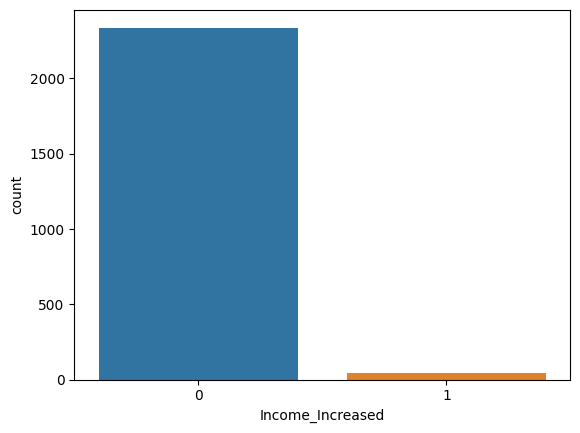

In [117]:
sns.countplot(data = final_data, x = 'Income_Increased')
plt.show()

In [118]:
round(final_data['Income_Increased'].value_counts(normalize = 'True')*100,2)

Income_Increased
0    98.19
1     1.81
Name: proportion, dtype: float64

In [119]:
## Insights -
## Above data shows that nearly 98% of the drivers did not get an increase in their income from the date of joining.

<Axes: xlabel='Education_Level', ylabel='count'>

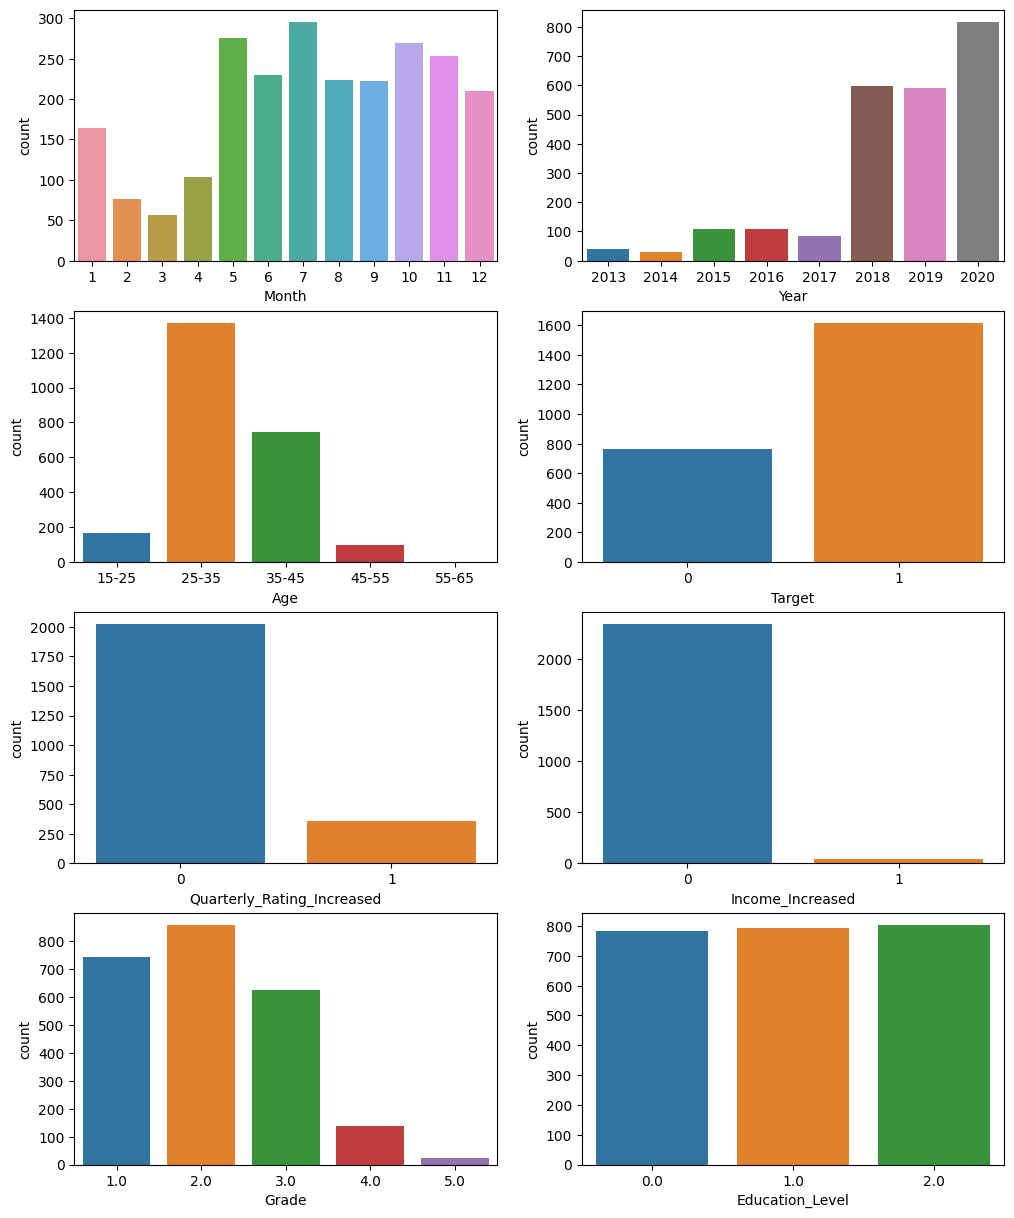

In [120]:
plt.figure(figsize = (12,15))
plt.subplot(4,2,1)
sns.countplot(data = final_data, x = final_data['Month'])
plt.subplot(4,2,2)
sns.countplot(data = final_data, x = final_data['Year'])
plt.subplot(4,2,3)
sns.countplot(data = final_data, x =  age_grp)
plt.subplot(4,2,4)
sns.countplot(data = final_data, x ='Target')
plt.subplot(4,2,5)
sns.countplot(data = final_data, x = 'Quarterly_Rating_Increased')
plt.subplot(4,2,6)
sns.countplot(data = final_data, x = 'Income_Increased')
plt.subplot(4,2,7)
sns.countplot(data = final_data, x = 'Grade')
plt.subplot(4,2,8)
sns.countplot(data = final_data, x = 'Education_Level')

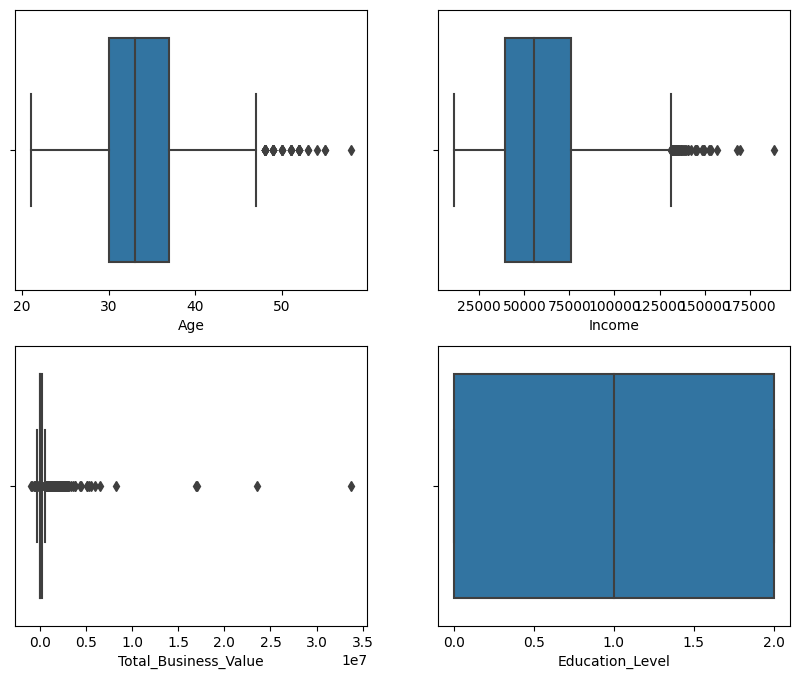

In [121]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(data = final_data, x = 'Age')
plt.subplot(2,2,2)
sns.boxplot(data = final_data, x = 'Income')
plt.subplot(2,2,3)
sns.boxplot(data = final_data, x =  'Total_Business_Value')
plt.subplot(2,2,4)
sns.boxplot(data = final_data, x =  'Education_Level')
plt.show()

In [122]:
# Outliers exist in Age, Income and Total_Business_Value made by the drivers.

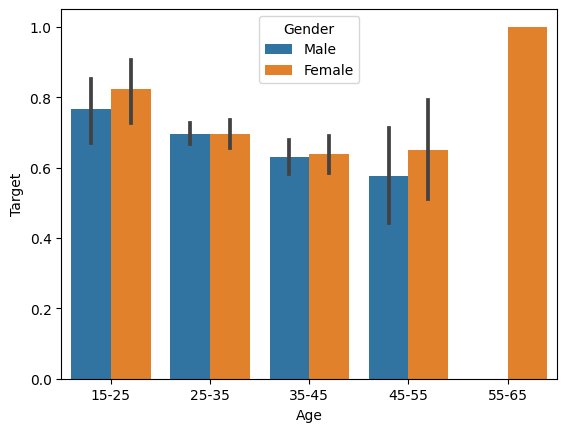

In [123]:
## BIVARIATE ANALYSIS

# 1. Age-wise distribution of the drivers wrt to their churn rate and gender.

sns.barplot(data = final_data, x = age_grp, y = 'Target', hue = 'Gender')
plt.show()

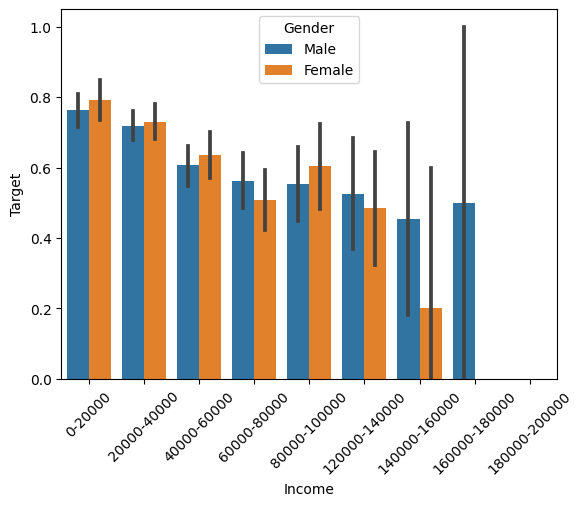

In [129]:
# 2. Income distribution of the drivers wrt to their churn rate and gender.

income_grp = pd.cut(final_data.Income, bins = [20000,40000,60000,80000,100000,120000,140000,160000,180000,200000], labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000','120000-140000','140000-160000','160000-180000','180000-200000'])
sns.barplot(data = final_data, x = income_grp, y = 'Target', hue = 'Gender')
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='Education_Level', ylabel='Target'>

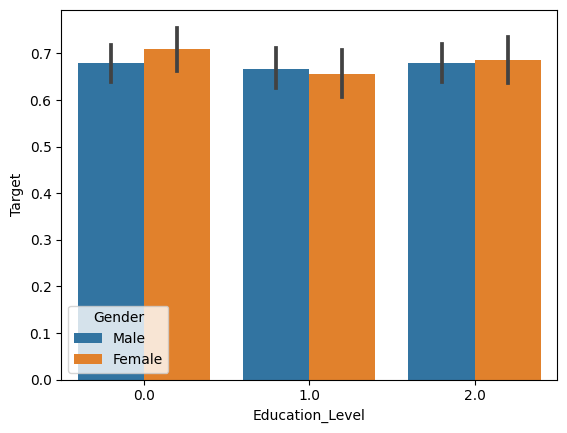

In [130]:
# 3. Education of thr drivers wrt to their churn rate and gender.

sns.barplot(data = final_data, x = 'Education_Level', y = 'Target', hue = 'Gender')

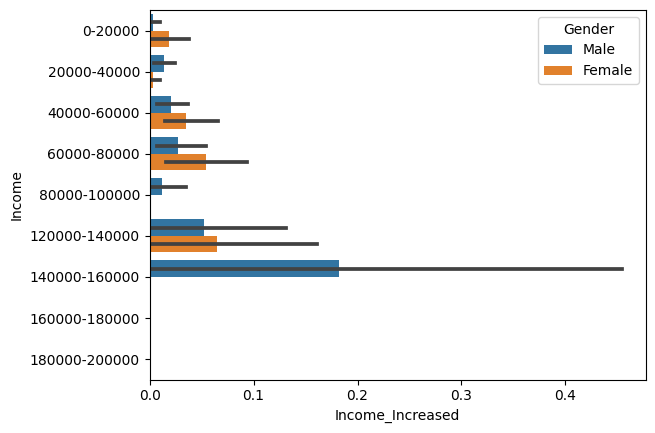

In [135]:
# 4. Income distribution of the drivers wrt to the increase in income and gender.

sns.barplot(data = final_data, x = 'Income_Increased', y = income_grp, hue = 'Gender')
plt.show()

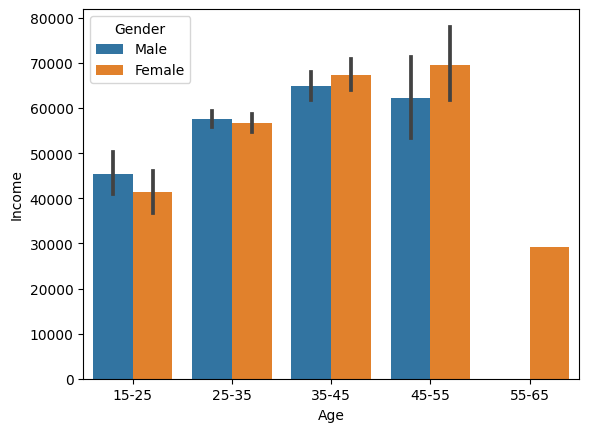

In [138]:
# 5. Monthly income distrubtion wrt driver age and gender.

sns.barplot(data = final_data, x = age_grp, y = 'Income', hue = 'Gender')
plt.show()

In [ ]:
## Insights - 
# 1. The churn rate is very high for drivers in the age-group of 15-25 yrs. Female drivers are seen to show a high churn compared to male drivers.
# 2. Lower income drivers below 40000 income show a high churn rate than drivers having high income. Another observation is that, with increase in the monthly income, retention of female drivers are high compared to male drivers.
# 3. Education distribution is equal for all drivers both male and female. Also, the churn rate of the drivers does not depend on their Education Level.
# 4. 
# 5. Drivers in the age group between 35-55 show high income than the smaller age group drivers. Also, a drop in the income of male drivers while a rise in the income of female drivers is observed with increasing age of the drivers.

In [139]:
## CORRELATION ANALYSIS
sns.heatmap(final_data.corr(method="pearson"), annot=True, cmap="crest")
plt.show()

ValueError: could not convert string to float: 'C23'